In [23]:
import numpy
import matplotlib.pyplot as plt

closures_noise = numpy.load("../data/EQ28XX_Fornax_GLEAM_all_FOV_30_ephemeris_HERA61_noisy.npz")
closures_noiseless = numpy.load("../data/EQ28XX_Fornax_GLEAM_all_FOV_30_ephemeris_HERA61_noiseless.npz")

In [24]:
print(list(closures_noiseless.keys()))

['triads', 'flags', 'last', 'closures', 'days']


In [25]:
cl_n = closures_noise['closures']
cl_nn = closures_noiseless['closures']

In [26]:
print(cl_n.shape)
print(cl_nn.shape)

(120, 4, 37, 1024)
(120, 4, 37, 1024)


In [27]:
def calculate_circular_dev(closures):
    cl_x = numpy.cos(closures)
    cl_y = numpy.sin(closures)
    av_x = numpy.mean(cl_x, axis=2)
    av_y = numpy.mean(cl_y, axis=2)
    
    # Calculate mean vector inside unit circle
    r = numpy.sqrt(numpy.square(av_x) + numpy.square(av_y))
    # Then calculate circular standard deviation
    std_dev = numpy.sqrt(-2 * numpy.log(r))
    return std_dev
    
stdev_noise = calculate_circular_dev(cl_n)
stdev_noiseless = calculate_circular_dev(cl_nn)

In [28]:
print(stdev_noise.shape)
print(stdev_noiseless.shape)

(120, 4, 1024)
(120, 4, 1024)


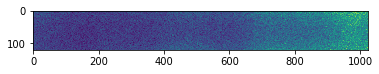

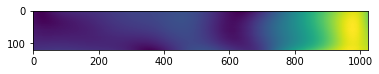

In [31]:
plt.imshow(stdev_noise[:,0,:])
plt.show()
plt.imshow(stdev_noiseless[:,0,:])
plt.show()